In [1]:
import sys
sys.path.insert(0, './gluon-cv/')

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import mxnet as mx
from mxnet import ndarray as F
from models.generator import defineG_unet
from models.discriminator import defineD_n_layers
from mxnet import gluon

from datasets.fascades import Fascades, _transformer

In [2]:
dataset = Fascades(
    root='/home/chenyifeng/pix2pix/datasets/facades/', 
    split='val', 
    mode='val', 
    transform=_transformer(),
    crop_size=256)

# ngpus = len(mx.test_utils.list_gpus())
ngpus = 1
batch_size = 1 * ngpus
loader = gluon.data.DataLoader(dataset, batch_size, shuffle=False, last_batch='rollover',num_workers=4)

In [3]:
load_iter = loader.__iter__()
image, label = load_iter.next()

gen = defineG_unet(input_nc=3, output_nc=3, ngf=64, ctx=mx.gpu(0))
dis = defineD_n_layers(input_nc=3, output_nc=3, ndf=64, n_layers=3, ctx=mx.gpu(0))

In [4]:
gen.load_parameters('/home/chenyifeng/MxData/models/gan/fascades/Gen_200.params')
dis.load_parameters('/home/chenyifeng/MxData/models/gan/fascades/Dis_200.params')

In [5]:
def denorm(x):
    x = np.transpose(x, (1, 2, 0))
    x = (x * 0.5 + 0.5) * 255
    x = x.astype(np.uint8)
    return x

In [14]:
image, label = load_iter.next()

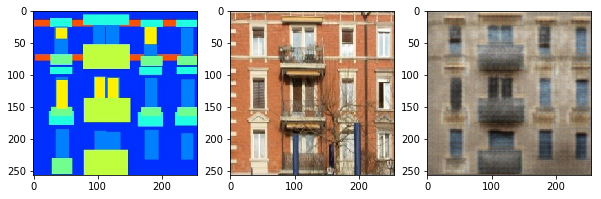

In [16]:
plt.figure(figsize=(10, 20))
real_B, real_A = image.as_in_context(mx.gpu(0)), label.as_in_context(mx.gpu(0))
fake_B = gen(real_A) 

plt.subplot(1, 3, 1)
plt.imshow(denorm(real_A.asnumpy()[0]))
plt.subplot(1, 3, 2)
plt.imshow(denorm(real_B.asnumpy()[0]))
plt.subplot(1, 3, 3)
plt.imshow(denorm(fake_B.asnumpy()[0]))